In [1]:
#visualisation and work with dfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,  Bidirectional, TimeDistributed, Flatten
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [14]:
arr1 = [1,2,2,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2]
arr2 = [0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(), metrics=['acc'])

model.fit(arr1, arr2, epochs=200)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6366 - acc: 0.5484
Epoch 2/200
31/31 [==============================] - 0s 44us/step - loss: 0.6359 - acc: 0.5484
Epoch 3/200
31/31 [==============================] - 0s 70us/step - loss: 0.6354 - acc: 0.5484
Epoch 4/200
31/31 [==============================] - 0s 37us/step - loss: 0.6350 - acc: 0.5484
Epoch 5/200
31/31 [==============================] - 0s 40us/step - loss: 0.6347 - acc: 0.5484
Epoch 6/200
31/31 [==============================] - 0s 40us/step - loss: 0.6343 - acc: 0.5484
Epoch 7/200
31/31 [==============================] - 0s 44us/step - loss: 0.6340 - ac

Epoch 82/200
31/31 [==============================] - 0s 33us/step - loss: 0.6180 - acc: 0.5484
Epoch 83/200
31/31 [==============================] - 0s 31us/step - loss: 0.6178 - acc: 0.5484
Epoch 84/200
31/31 [==============================] - 0s 105us/step - loss: 0.6176 - acc: 0.5484
Epoch 85/200
31/31 [==============================] - 0s 37us/step - loss: 0.6174 - acc: 0.5484
Epoch 86/200
31/31 [==============================] - 0s 31us/step - loss: 0.6172 - acc: 0.5484
Epoch 87/200
31/31 [==============================] - 0s 56us/step - loss: 0.6170 - acc: 0.5484
Epoch 88/200
31/31 [==============================] - 0s 36us/step - loss: 0.6168 - acc: 0.5484
Epoch 89/200
31/31 [==============================] - 0s 30us/step - loss: 0.6166 - acc: 0.5484
Epoch 90/200
31/31 [==============================] - 0s 40us/step - loss: 0.6164 - acc: 0.5484
Epoch 91/200
31/31 [==============================] - 0s 35us/step - loss: 0.6162 - acc: 0.5484
Epoch 92/200
31/31 [===================

Epoch 167/200
31/31 [==============================] - 0s 51us/step - loss: 0.6014 - acc: 0.5484
Epoch 168/200
31/31 [==============================] - 0s 37us/step - loss: 0.6012 - acc: 0.5484
Epoch 169/200
31/31 [==============================] - 0s 90us/step - loss: 0.6010 - acc: 0.5484
Epoch 170/200
31/31 [==============================] - 0s 31us/step - loss: 0.6008 - acc: 0.5484
Epoch 171/200
31/31 [==============================] - 0s 77us/step - loss: 0.6006 - acc: 0.5484
Epoch 172/200
31/31 [==============================] - 0s 163us/step - loss: 0.6005 - acc: 0.5484
Epoch 173/200
31/31 [==============================] - 0s 31us/step - loss: 0.6003 - acc: 0.5484
Epoch 174/200
31/31 [==============================] - 0s 31us/step - loss: 0.6001 - acc: 0.5484
Epoch 175/200
31/31 [==============================] - 0s 34us/step - loss: 0.5999 - acc: 0.5484
Epoch 176/200
31/31 [==============================] - 0s 72us/step - loss: 0.5997 - acc: 0.5484
Epoch 177/200
31/31 [========

In [32]:
import random
ar, idx = [], []
for i in range(-10, 10):
    idx.append(i)
    ar.append(model.predict([i])[0])

,0
point,
-10,0.010346
-9,0.015891
-8,0.024335
-7,0.037096
-6,0.056163
-5,0.084175
-4,0.124316
-3,0.179842
-2,0.253003


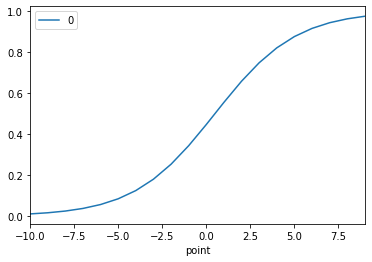

In [33]:
import pandas as pd
ar = pd.DataFrame(ar)
ar['point'] = idx
ar.set_index('point', inplace=True)
ar.plot()
ar

In [5]:
model1 = Sequential()
model1.add(Dense(1, input_dim=1, activation='linear'))
model1.add(Activation('sigmoid'))
model1.layers

In [6]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model1.fit(arr1, arr2, epochs=200, verbose=0)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


[array([0.54494846], dtype=float32), array([0.5896442], dtype=float32), array([0.54494846], dtype=float32), array([0.54494846], dtype=float32), array([0.5896442], dtype=float32), array([0.54494846], dtype=float32), array([0.5896442], dtype=float32), array([0.5896442], dtype=float32), array([0.5896442], dtype=float32), array([0.5896442], dtype=float32)]


,0
point,
1,0.544948
2,0.589644
1,0.544948
1,0.544948
2,0.589644
1,0.544948
2,0.589644
2,0.589644
2,0.589644


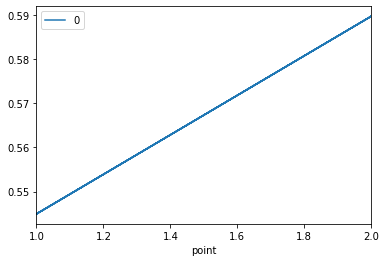

In [24]:
ar5,ar, idx = [1,2,1,1,2,1,2,2,2,2],[], []
for i in ar5:
    idx.append(i)
    ar.append(model1.predict([i])[0])
    
print(ar)
import pandas as pd
ar = pd.DataFrame(ar)
ar['point'] = idx
ar.set_index('point', inplace=True)
ar.plot()
ar

In [25]:
model.weights


[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.43475854]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-0.2131401], dtype=float32)>]

In [34]:
test1, test2 = [1,1,1,1,2,2,2,2], [0,0,0,0,1,1,1,1]
accr = model.evaluate(test1, test2)
accr

8/8 [==============================] - 0s 78us/step


[0.6139779686927795, 0.5]

In [35]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.614
  Accuracy: 0.500
